<a href="https://colab.research.google.com/github/ReneGuzmanDS/ReneGuzmanDS/blob/main/California_housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California housing: Median Price prediction

## Descriptive analysis

### load the data

In [1]:
import pandas as pd # Importing the pandas library

housing_data = pd.read_csv('sample_data/california_housing_test.csv') # load the california housing data

### Exploratory data analysis


In [2]:
# Exploring the sctructure of the data

print(housing_data.head())
print(housing_data.info())
print(housing_data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------     

### Exploratory data visualization


In [ ]:
#
import matplotlib.pyplot as plt
import seaborn as sns

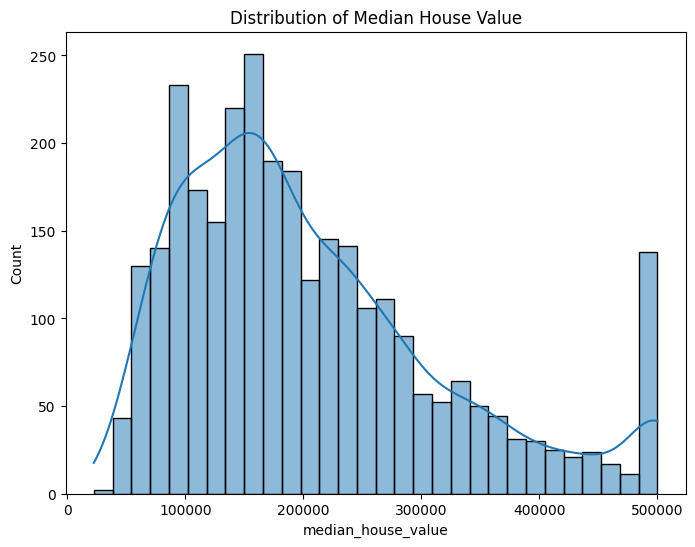

In [ ]:
# Histogram of the target variable (median house value)
plt.figure(figsize=(8, 6))
sns.histplot(housing_data['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.show()



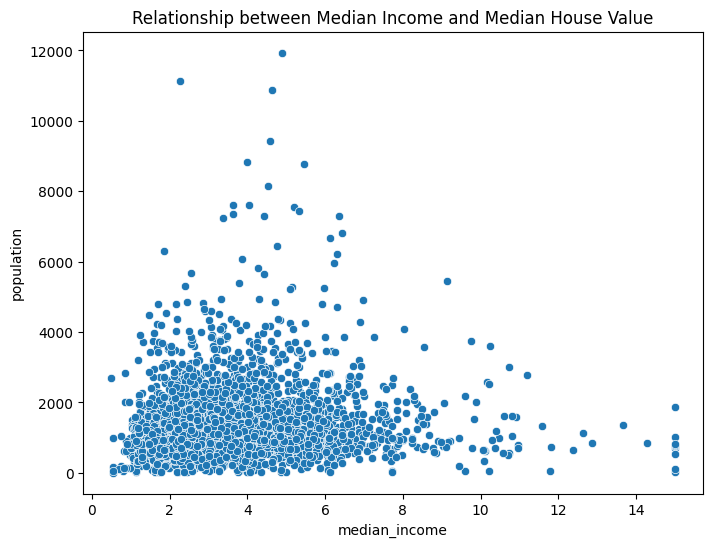

In [ ]:
# Scatter plot between two variables (median income and median house value)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housing_data['median_income'], y=housing_data['population'], data=housing_data)
plt.title('Relationship between Median Income and Population')
plt.show()

In [ ]:
# Evaluation of missin values

print(housing_data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


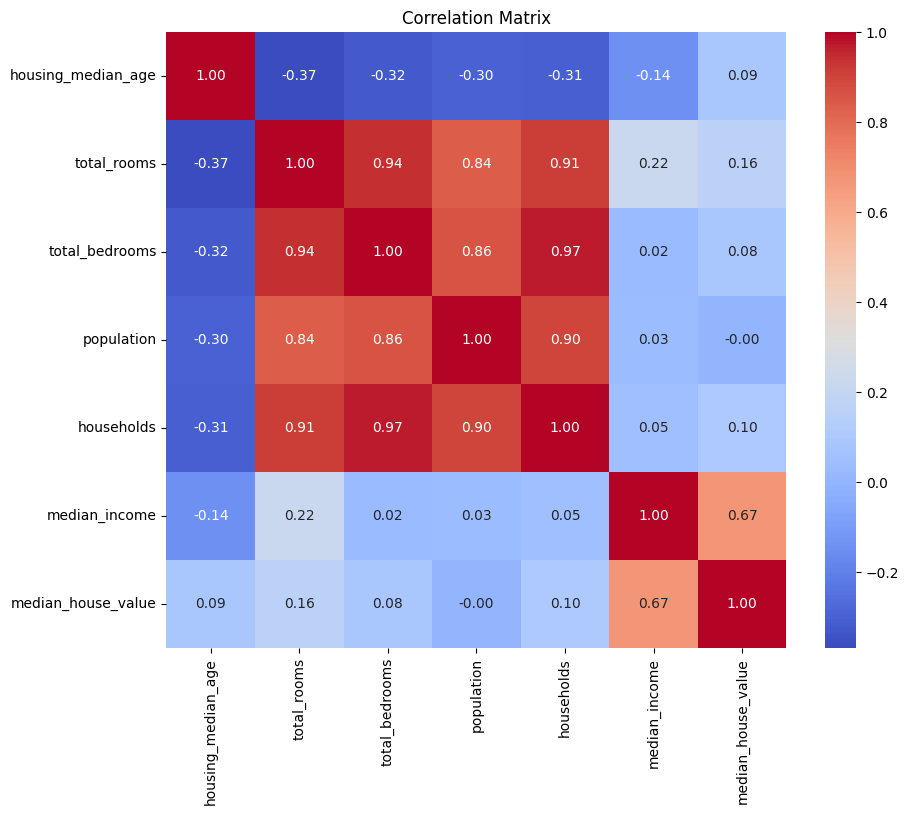

In [ ]:
df_cor = housing_data

df_cor = df_cor.loc[:, ~df_cor.columns.isin(['latitude', 'longitude'])] # Excluding lat and long

correlation_matrix = df_cor.corr() # correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Predict of housing values (median) using lineal regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load your dataset (change names for simplicity)
data = housing_data




Select Predictor Variables and Target Variable:


In [ ]:
# Features: median_income
# target : Median_house_value
features = data[['median_income']]  # Include all the features you want to consider
target = data['median_house_value']

Split the Data into Training and Testing Sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Train the linear Regression Model:

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Predictions:
predictions = model.predict(X_test)


In [ ]:
# Evaluate the Model:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}') # the median income predict the 50% of the variability of the target variable.


Mean Squared Error: 6355701945.134971
R-squared: 0.4953198289574966
